In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import regex as re
# import requests
# import ast
# from bs4 import BeautifulSoup as bsoup

#so I can get sounds to play
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*2)/10000)
#So I can see multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#Commented out so I don't accidentally rerun it
df = pd.read_csv('recipe_overclean.csv', names = range(80), sep = ",", quotechar = '"', skipinitialspace=True, error_bad_lines = False, dtype=object, index_col=False)

In [ ]:
df.rename(columns={0: 'Website', 1: 'Link', 2: 'Title', 3: 'TotalTime'}, inplace=True)

In [ ]:
len(df)
df.sample(5)

In [ ]:
df['TotalIng'] = df.isnull().sum(axis=1)
df.sample(10)

In [ ]:
agg1 = df.groupby("Website").size()
agg2 = 76 - df.groupby('Website')[["TotalIng"]].mean()
website = pd.concat([agg1, agg2], axis=1, sort=False)
website.rename(columns={0: 'NumRecipes', 'TotalIng': 'AveNumIngr'}, inplace=True)
website

In [ ]:
# Summary statistic of each website's recipes
wb_topsum = website.sort_values(by='NumRecipes',ascending=False).head(20)
wb_topave = website.sort_values(by='AveNumIngr',ascending=False).head(20)

In [ ]:
wb_topsum
wb_topave

In [ ]:
plt.figure(figsize=(15,10))
wb_topsum.NumRecipes.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Website of Origin")
plt.ylabel("Number of Recipes")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
wb_topsum.AveNumIngr.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Website of Origin")
plt.ylabel("Average Number of Ingredients")
plt.show()

In [ ]:
df.groupby("Website")['TotalTime'].sum()

In [167]:
#concat text by rows grouped by 
ingredients = df.groupby('Website').agg(lambda x: ', '.join(x.astype(str)))
ingredients = ingredients[['Title', 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]]

In [168]:
ingredients.loc[:,'AggIngredients'] = ingredients[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79]].astype(str).apply(' '.join, axis=1)

In [169]:
ingredients = ingredients[['Title','AggIngredients']]

In [188]:
# Create stopword list:
stopwords = set(STOPWORDS)
stop1 = ['a', 'and', 'the', 'or', 'of', 'if', 'on', 'but',
        'pinch', 'left', 'peeled', 'cut', 'chopped', 'sliced',
        'small', 'medium', 'large', 'whole', 'into', 'in', 'to',
        'plus', 'more', 'thick', 'halved', 'quartered', 'good',
        'inch', 'inches', 'about', 'sea', 'end', 'approximate',
        'approximately', 'very', 'finely', 'for', 'nan', 'none', 'recipe']
measurement = ['teaspoon', 'tsp', 'tablespoon', 'tbsp',
               'teaspoons', 'tablespoons', 
                'ounce', 'oz', 'cup', 'pint', 'pt', 
                'ounces', 'cups', 'pints',
                'quart', 'qt', 'gallon', 'gal',
                'quarts', 'gallons',
                'pounds', 'lbs', 'grams', 'kilograms',
                'milliliter', 'liter', 'weight',
                'milliliters', 'liters']
amounts = ["1", "one", "2", "two", "3", 'three','4','four','5','five','6','six','7','seven','8','eight','9','nine','10','ten']
stopwords.update(stop1,measurement,amounts)

In [163]:
def wc(site,section, pic=None):
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",mask=pic).generate(ingredients.loc[site,section])
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
food_mask = np.array(Image.open("CoveredHotPlate.jpg"))
food_mask

In [ ]:
#swap number 0 to 255
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
#Sometimes the mask needs to be transformed?
#Transform your mask into a new one that will work with the function:
transformed_food_mask = np.ndarray((food_mask.shape[0],food_mask.shape[1]), np.int32)

for i in range(len(food_mask)):
    for j in range(len(food_mask[i])):
        transformed_food_mask[i][j] = list(map(transform_format, food_mask[i][j]))

In [ ]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",mask=food_mask).generate(ingredients.loc['bonappetit','Title'])
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [191]:
wb_topsum

,NumRecipes,AveNumIngr
Website,,
tastykitchen,39387,10.129383
epicurious,33828,9.758218
foodnetwork,13957,12.386258
bonappetit,12464,10.642089
cookstr,7009,10.277786
foodrepublic,3617,11.704451
food,2429,12.484562
finedininglovers,1844,11.404555
whatsgabycooking,1161,11.171404


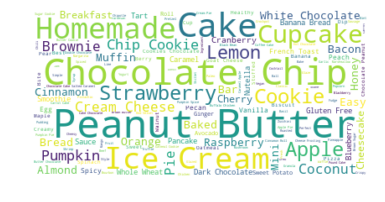

In [151]:
wc('tastykitchen','Title')

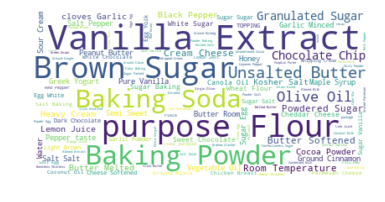

In [156]:
wc('tastykitchen','AggIngredients')

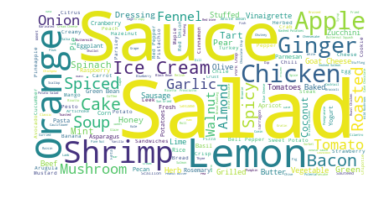

In [157]:
wc('epicurious','Title')

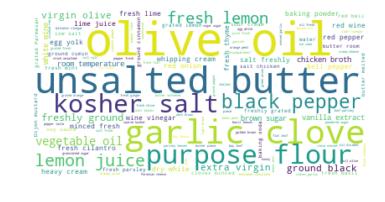

In [158]:
wc('epicurious','AggIngredients')

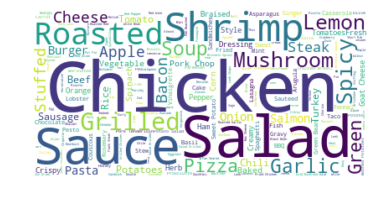

In [159]:
wc('foodnetwork','Title')

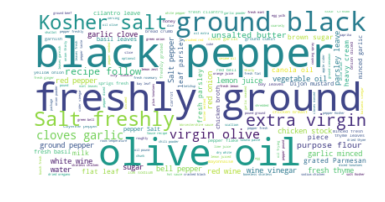

In [160]:
wc('foodnetwork','AggIngredients')

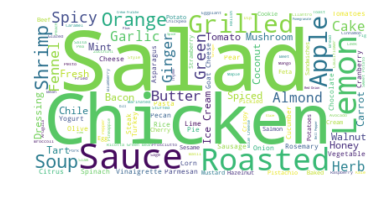

In [164]:
wc('bonappetit','Title')

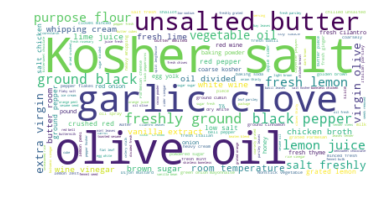

In [162]:
wc('bonappetit','AggIngredients')

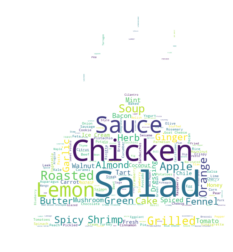

In [165]:
wc('bonappetit','Title',food_mask)

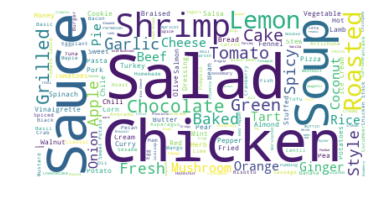

In [192]:
wc('cookstr','Title')

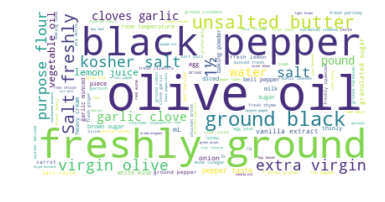

In [193]:
wc('cookstr', 'AggIngredients')

In [170]:
ingredients.to_csv(path_or_buf = f'ingredients_agg.csv')

In [ ]:
ingredients['Title'].str.cat()

(-0.5, 399.5, 199.5, -0.5)

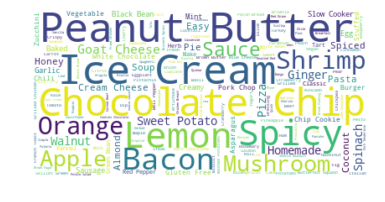

In [189]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ingredients['Title'].str.cat())
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

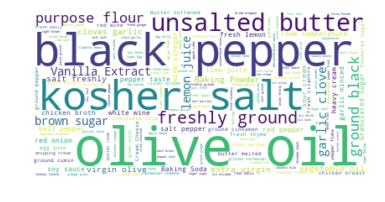

In [190]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(ingredients['AggIngredients'].str.cat())
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()